# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/Tina_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Variables to keep track of response number
city_data = []

record_num = 0
record_set = 1

# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



print("Beginning Data Retrieval")
print("---------------------------")

# Iterrows in to loop city row in query url
for city in cities:
    
    if record_num <=49:
        record_num += 1
    else:
        record_set += 1
        record_num = 1
        
    #create a query for API call
    query_url = base_url + "&q=" + city
    
    print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {city}')
    
    #api call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try:     
            
 # Add retrieved data into cities_list data frame
        city_clouds = response['clouds']['all']
        city_date = response['dt']
        city_humidity = response['main']['humidity']
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_windspeed = response['wind']['speed']
        city_country = response['sys']['country']
            
       # Append data to city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Long": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Windspeed": city_windspeed,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found....Skipping............")
        pass
        
        
print('-----------------------------')
print('Data Retrival Complete')
print('-----------------------------')

Beginning Data Retrieval
---------------------------
Processing Weather Data for Record 1 of Set 1 | saint-philippe
Processing Weather Data for Record 2 of Set 1 | beringovskiy
Processing Weather Data for Record 3 of Set 1 | bredasdorp
Processing Weather Data for Record 4 of Set 1 | ahuimanu
Processing Weather Data for Record 5 of Set 1 | saint george
Processing Weather Data for Record 6 of Set 1 | dingle
Processing Weather Data for Record 7 of Set 1 | qaanaaq
Processing Weather Data for Record 8 of Set 1 | lagoa
Processing Weather Data for Record 9 of Set 1 | jamestown
Processing Weather Data for Record 10 of Set 1 | songjianghe
Processing Weather Data for Record 11 of Set 1 | hermanus
Processing Weather Data for Record 12 of Set 1 | cozumel
Processing Weather Data for Record 13 of Set 1 | lolua
City not found....Skipping............
Processing Weather Data for Record 14 of Set 1 | norman wells
Processing Weather Data for Record 15 of Set 1 | bluff
Processing Weather Data for Record 1

Processing Weather Data for Record 38 of Set 3 | baillif
Processing Weather Data for Record 39 of Set 3 | zhangye
Processing Weather Data for Record 40 of Set 3 | wanxian
Processing Weather Data for Record 41 of Set 3 | ribeira grande
Processing Weather Data for Record 42 of Set 3 | ostrovnoy
Processing Weather Data for Record 43 of Set 3 | touros
Processing Weather Data for Record 44 of Set 3 | bethel
Processing Weather Data for Record 45 of Set 3 | fukue
Processing Weather Data for Record 46 of Set 3 | kuah
Processing Weather Data for Record 47 of Set 3 | castro
Processing Weather Data for Record 48 of Set 3 | houma
Processing Weather Data for Record 49 of Set 3 | vao
Processing Weather Data for Record 50 of Set 3 | ust-omchug
Processing Weather Data for Record 1 of Set 4 | kutum
Processing Weather Data for Record 2 of Set 4 | chuy
Processing Weather Data for Record 3 of Set 4 | chapais
Processing Weather Data for Record 4 of Set 4 | asau
Processing Weather Data for Record 5 of Set 4

Processing Weather Data for Record 26 of Set 6 | resavica
Processing Weather Data for Record 27 of Set 6 | gat
Processing Weather Data for Record 28 of Set 6 | alofi
Processing Weather Data for Record 29 of Set 6 | kulebaki
Processing Weather Data for Record 30 of Set 6 | sika
Processing Weather Data for Record 31 of Set 6 | talnakh
Processing Weather Data for Record 32 of Set 6 | bilibino
Processing Weather Data for Record 33 of Set 6 | mambajao
Processing Weather Data for Record 34 of Set 6 | hualmay
Processing Weather Data for Record 35 of Set 6 | yar-sale
Processing Weather Data for Record 36 of Set 6 | dombarovskiy
Processing Weather Data for Record 37 of Set 6 | steinbach
Processing Weather Data for Record 38 of Set 6 | hohhot
Processing Weather Data for Record 39 of Set 6 | sam roi yot
Processing Weather Data for Record 40 of Set 6 | lavrentiya
Processing Weather Data for Record 41 of Set 6 | san felipe
Processing Weather Data for Record 42 of Set 6 | oum hadjer
Processing Weath

Processing Weather Data for Record 12 of Set 9 | weihai
Processing Weather Data for Record 13 of Set 9 | tacuarembo
Processing Weather Data for Record 14 of Set 9 | aban
Processing Weather Data for Record 15 of Set 9 | sumbawa
City not found....Skipping............
Processing Weather Data for Record 16 of Set 9 | hofn
Processing Weather Data for Record 17 of Set 9 | sentyabrskiy
City not found....Skipping............
Processing Weather Data for Record 18 of Set 9 | heihe
Processing Weather Data for Record 19 of Set 9 | obo
Processing Weather Data for Record 20 of Set 9 | ust-tsilma
Processing Weather Data for Record 21 of Set 9 | okha
Processing Weather Data for Record 22 of Set 9 | marcona
City not found....Skipping............
Processing Weather Data for Record 23 of Set 9 | shirgaon
Processing Weather Data for Record 24 of Set 9 | felidhoo
City not found....Skipping............
Processing Weather Data for Record 25 of Set 9 | pacifica
Processing Weather Data for Record 26 of Set 9 |

Processing Weather Data for Record 45 of Set 11 | lethem
Processing Weather Data for Record 46 of Set 11 | svetlaya
Processing Weather Data for Record 47 of Set 11 | vysokogornyy
Processing Weather Data for Record 48 of Set 11 | golden
Processing Weather Data for Record 49 of Set 11 | arnissa
Processing Weather Data for Record 50 of Set 11 | ilhabela
Processing Weather Data for Record 1 of Set 12 | zhicheng
Processing Weather Data for Record 2 of Set 12 | cajamarca
Processing Weather Data for Record 3 of Set 12 | toamasina
Processing Weather Data for Record 4 of Set 12 | cabo san lucas
Processing Weather Data for Record 5 of Set 12 | saint-pierre
Processing Weather Data for Record 6 of Set 12 | harrisonburg
Processing Weather Data for Record 7 of Set 12 | eirunepe
Processing Weather Data for Record 8 of Set 12 | gisborne
Processing Weather Data for Record 9 of Set 12 | williamsburg
Processing Weather Data for Record 10 of Set 12 | huarmey
Processing Weather Data for Record 11 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create dataframe from city_data list
city_data_df = pd.DataFrame(city_data)

In [7]:
city_data_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,saint-philippe,-21.36,55.77,73.40,64,0,5.82,RE,1603836949
1,beringovskiy,63.05,179.32,27.19,92,85,11.88,RU,1603836803
2,bredasdorp,-34.53,20.04,64.40,77,100,4.70,ZA,1603836949
3,ahuimanu,21.44,-157.84,80.60,74,90,4.88,US,1603836949
4,saint george,37.10,-113.58,61.00,9,1,3.36,US,1603836788
...,...,...,...,...,...,...,...,...,...
578,faya,18.39,42.45,60.80,19,0,4.70,SA,1603837016
579,axim,4.87,-2.24,78.46,86,100,8.08,GH,1603836900
580,mackay,-21.15,149.20,78.01,83,40,4.70,AU,1603836927
581,port lincoln,-34.73,135.87,58.93,73,0,6.31,AU,1603837016


In [10]:
#Save dataframe
city_data_df.to_csv(output_data_file, index_label = "City ID")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,21.773962,18.530034,58.005609,73.063465,51.675815,7.450720,1.603837e+09
std,32.606791,91.884052,21.139041,21.244795,39.830477,5.241441,7.162514e+01
min,-54.800000,-175.200000,-11.830000,4.000000,0.000000,0.200000,1.603837e+09
25%,-3.775000,-65.165000,43.755000,65.000000,5.000000,3.360000,1.603837e+09
50%,27.980000,25.390000,62.600000,79.000000,63.000000,6.260000,1.603837e+09
75%,49.310000,100.345000,75.605000,88.000000,90.000000,10.290000,1.603837e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,39.280000,1.603837e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
#extract relevant fields for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
windspeed = city_data_df['Windspeed']


## Latitude vs. Temperature Plot

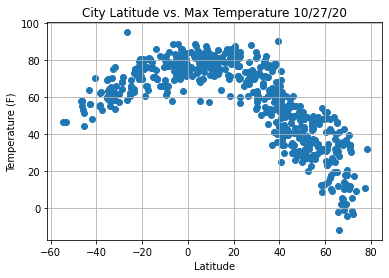

In [14]:
# Build a scatter plot for each data type
plt.scatter(lats, max_temp, marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%x")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

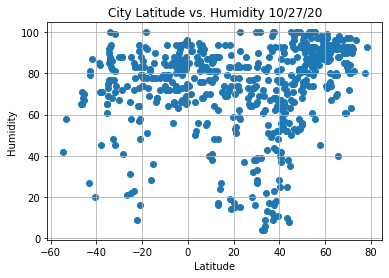

In [15]:
# Build a scatter plot for each data type
plt.scatter(lats, humidity, marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%x")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

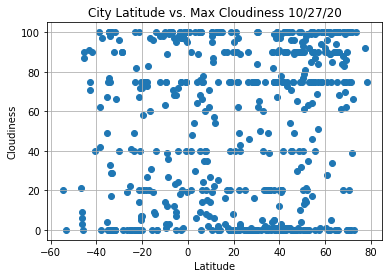

In [16]:
# Build a scatter plot for each data type
plt.scatter(lats, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%x")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

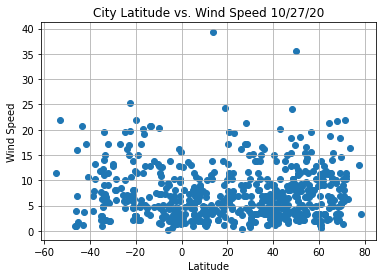

In [19]:
# Build a scatter plot for each data type
plt.scatter(lats, windspeed, marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%x")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [48]:
def plotLinearRegression(x_values,y_values,xlbl,ylbl,lpos):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Get regression values
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r-')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.annotate(line_eq,(20,15),color="red")
    plt.show()
    
    


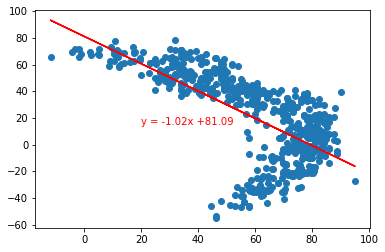

In [55]:
# Perform a linear regression on temperature vs. latitude
x_values = max_temp
y_values = lats

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(20,15),color="red")

plt.savefig("../output_data/City fig1.png")
plt.show()

In [31]:
nothern = city_data_df.loc[city_data_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = city_data_df.loc[city_data_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

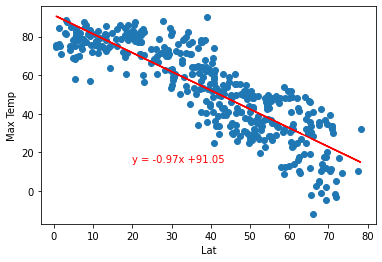

In [56]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

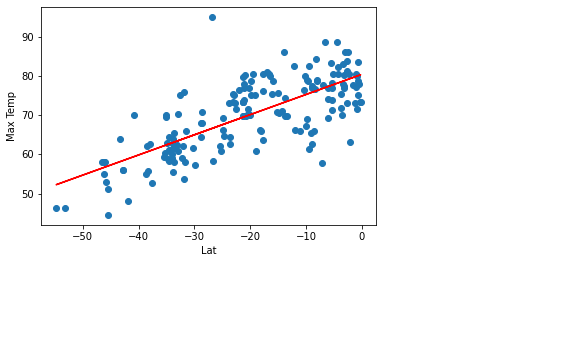

In [57]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

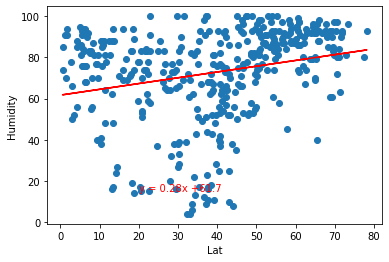

In [58]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

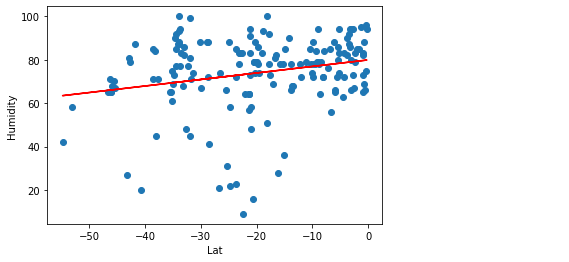

In [59]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

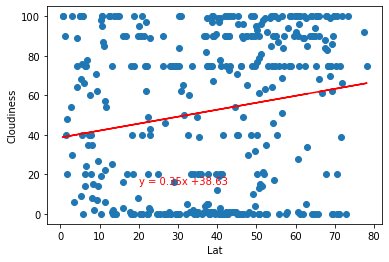

In [60]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

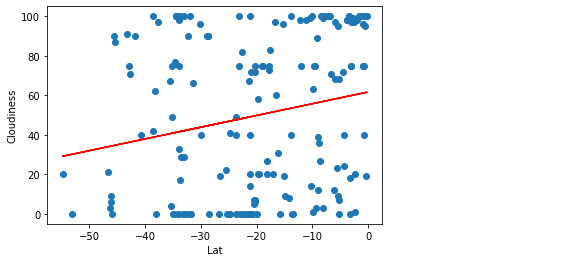

In [61]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

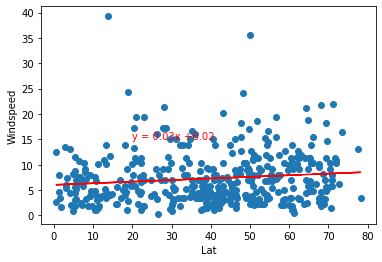

In [65]:
xlbl = "Lat"
ylbl = "Windspeed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

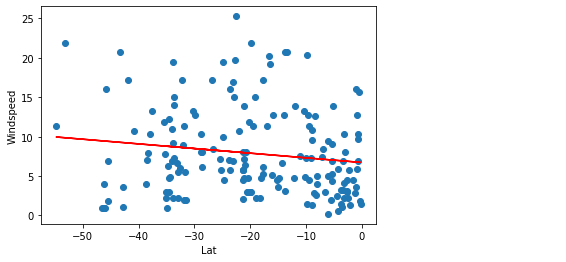

In [66]:
xlbl = "Lat"
ylbl = "Windspeed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

In [ ]:
Observations:

1. As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
2. It seems that there is no correlation between humidity and latitude
3. Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic